In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [2]:
#ds =  xr.open_dataset('/home/anna/annaCode/forecast_notebooks/MyWaveWAM800/data/MyWave_wam800_c1SPC00.nc')
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/ww3_4km_latest_files/ww3_C1_SPC_20241216T00Z.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 1GB
Dimensions:                  (direction: 36, freq: 36, x: 1328, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 5kB 1 2 3 4 5 ... 1325 1326 1327 1328
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-15T18:00:00 ....
    longitude                (y, x) float32 5kB ...
    latitude                 (y, x) float32 5kB ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float64 1GB ...
    ff                       (time, y, x) float64 776kB ...
    dd                       (time, y, x) float64 776kB ...
    Pdir                     (time, y, x) float32 388kB ...
    hs                       (time, y, x) float32 388kB ...
    tp                       (time, y, x) float32 388kB ...
Attributes:
    title:                           2D wave spectra
    history:                         Mon Dec 16 03:27:46 2024: ncks -A -v hs,...
    history_of_appended_files:       Mon Dec 16 03:27:46 2024: Appended file ...
    NCO:                             netCDF Operators version 5.0.6 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 1328)> Size: 5kB
[1328 values with dtype=float32]
Coordinates:
  * x          (x) int32 5kB 1 2 3 4 5 6 7 ... 1323 1324 1325 1326 1327 1328
  * y          (y) int32 4B 1
    longitude  (y, x) float32 5kB ...
    latitude   (y, x) float32 5kB ...
Attributes:
    standard_name:  latitude
    units:          degree_north
    long_name:      latitude

In [4]:
res = ds.longitude
res.values

array([[ 9.4901,  9.5046,  9.5192, ..., 28.9981, 29.0087, 29.0194]],
      dtype=float32)

In [5]:
res = ds.latitude
res.values

array([[67.4337, 67.428 , 67.4224, ..., 70.9077, 70.9007, 70.8938]],
      dtype=float32)

In [6]:
ds.latitude.values[0]

array([67.4337, 67.428 , 67.4224, ..., 70.9077, 70.9007, 70.8938],
      dtype=float32)

In [7]:
len(ds.latitude.values[0]), len(ds.longitude.values[0])

(1328, 1328)

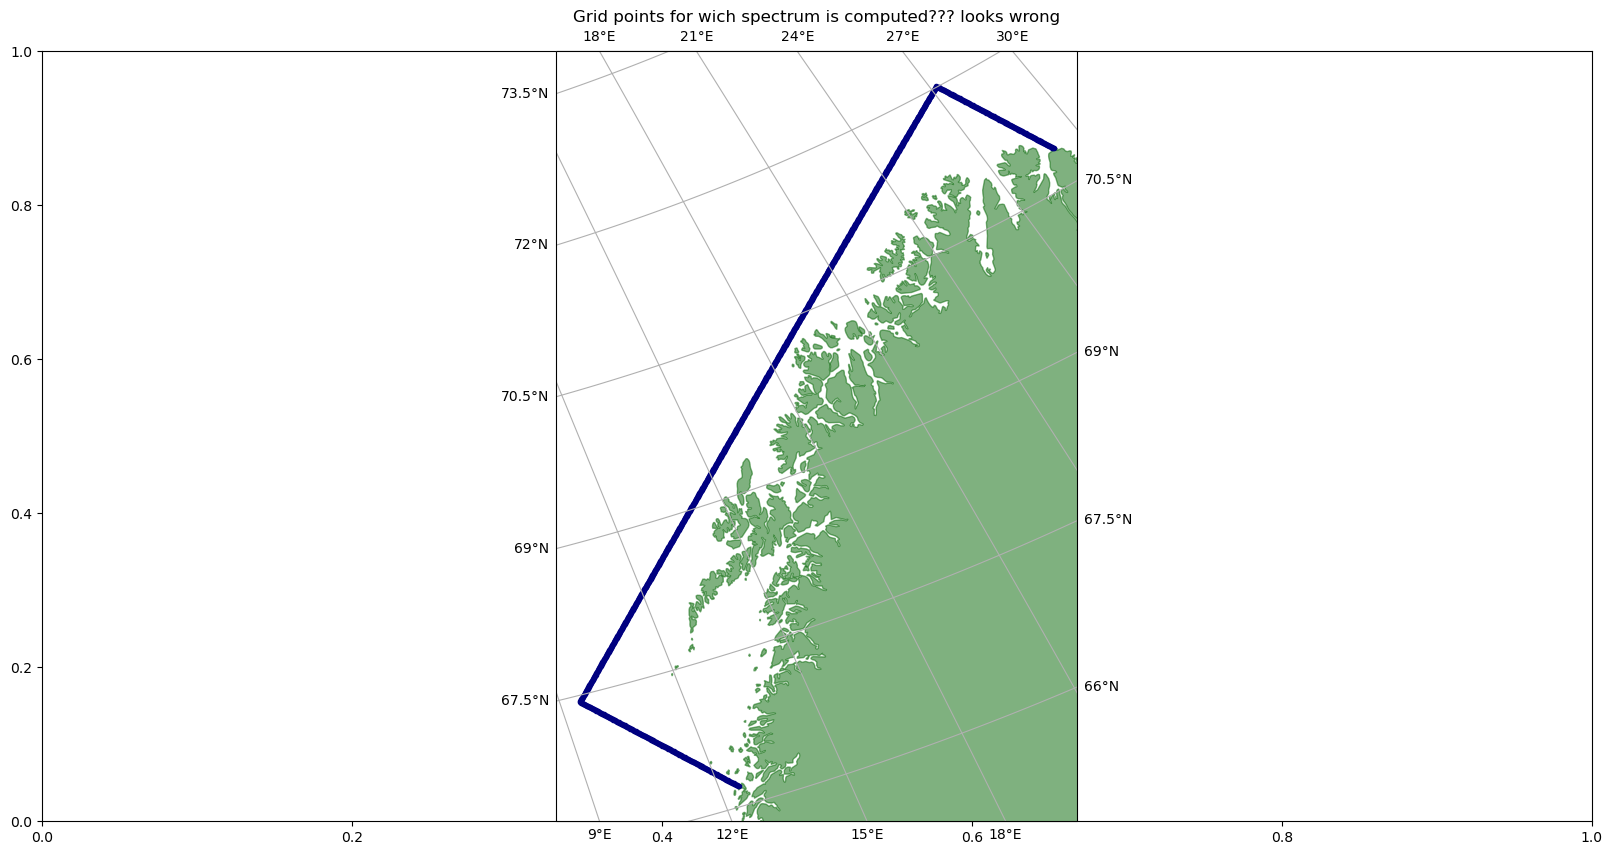

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.set_title("Grid points for wich spectrum is computed??? looks wrong")
ax.gridlines(draw_labels=True)